In [1]:
%pylab inline
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import iplot

from scipy import signal
from scipy.signal import get_window

AVAILABLE_WINDOWS = ['boxcar', 'triang', 'blackman', 'hamming', 'hann', 'bartlett', 
                     'flattop', 'parzen', 'bohman', 'blackmanharris', 'nuttall',
                     'barthann']


    
def plot_windows(windows, Nx=2):
    # boxcar, triang, blackman, hamming, hann, bartlett, 
    # flattop, parzen, bohman, blackmanharris, nuttall, 
    # barthann, 
    
    # kaiser (needs beta), 
    # gaussian (needs standard deviation), 
    # general_gaussian (needs power, width), 
    # slepian (needs width), 
    # dpss (needs normalized half-bandwidth), 
    # chebwin (needs attenuation), 
    # exponential (needs decay scale), 
    # tukey (needs taper fraction)
    if isinstance(windows, unicode) or isinstance(windows, str):
        windows = [windows]
    traces = []
    
    for window in windows:
        gwindow = get_window(window, Nx=Nx)
        traces.append(go.Scatter(x=np.arange(0, Nx), y=gwindow, name=window))
    iplot(traces)

    


Populating the interactive namespace from numpy and matplotlib


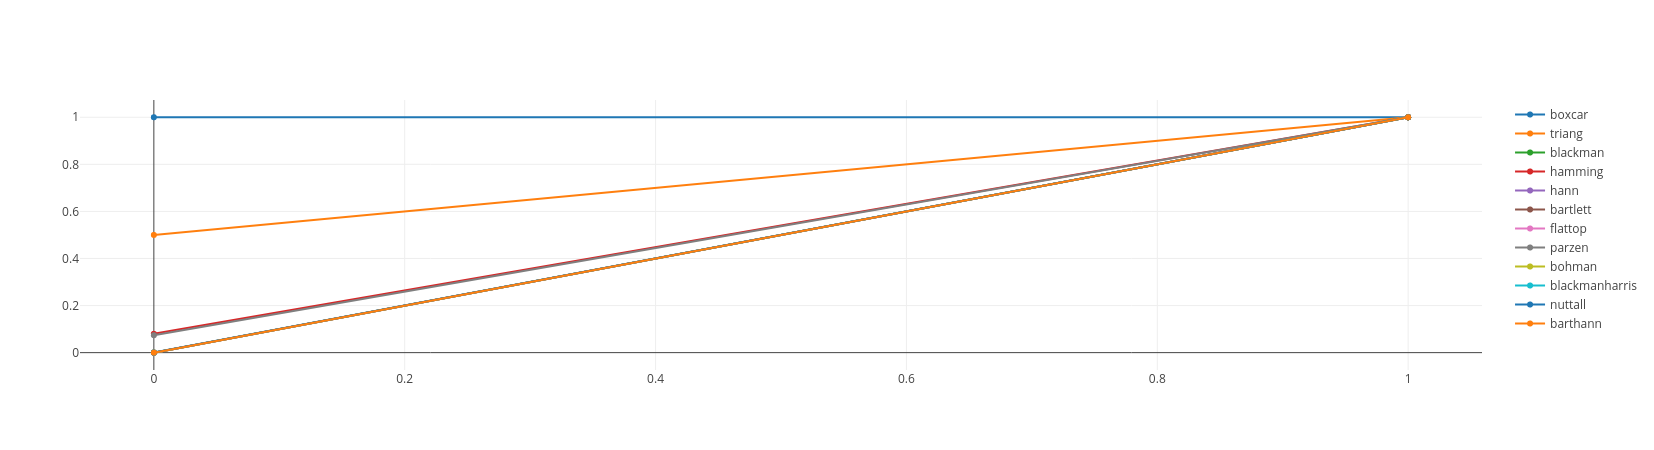

In [2]:
plot_windows(AVAILABLE_WINDOWS)

In [3]:

def plot_freq_mix(freq1, freq2, windows):
    if not isinstance(windows, tuple):
        windows = [windows]
    fig = plt.figure(figsize=(25, 20))
    ax = plt.subplot(211)
    t = np.arange(0, 60, step=1)
    s = np.sin( 2*t*np.pi*freq1) + np.sin( 2*t*np.pi*freq2)
    

    setup_axis(ax)
    ax.plot(t, s)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax = plt.subplot(212)
    for color, window in zip(colors, windows):
        n = 4096
        w = np.fft.rfft(s * get_window(window, 60), n=n)
        freqs = np.fft.rfftfreq(n, d=t[1] - t[0])
        ax.plot(freqs, 20*np.log10(np.abs(w)), label=window, color=color)
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
    ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
              ncol=4, mode="expand", borderaxespad=0.)
    setup_axis(ax)
    ax.set_xlabel('Frequnecy (Hz)')
    ax.set_ylabel('decibels')

    fig.tight_layout()
interact(plot_freq_mix, 
         freq1=widgets.FloatSlider(min=0.1,max=30,step=0.01,value=0.33), 
         freq2=widgets.FloatSlider(min=0.1,max=30,step=0.01,value=0.33),
         windows=select,)


NameError: name 'interact' is not defined